# Pokemon EDA

The data comes from https://www.kaggle.com/datasets/abcsds/pokemon. This dataset features pokemon from the first 6 generations.

Below are the descriptions for each of the columns:

- **#**: ID for each pokemon
- **Name**: Name of each pokemon
- **Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks
- **Type 2**: Some pokemon are dual type and have 2
- **Total**: sum of all stats that come after this, a general guide to how strong a pokemon is
- **HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting
- **Attack**: the base modifier for normal attacks (eg. Scratch, Punch)
- **Defense**: the base damage resistance against normal attacks
- **SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- **SP Def**: the base damage resistance against special attacks
- **Speed**: determines which pokemon attacks first each round

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.express as px
import seaborn as sns

stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [2]:
df = pd.read_csv("Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


From above, we can see that this dataset also includes mega variants. Some other pokemon have other variants. For example, Hoopa has 2 forms: confined form, which is the default, and unbound form.

In [3]:
df[df.Name.str.contains("Mega")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [4]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


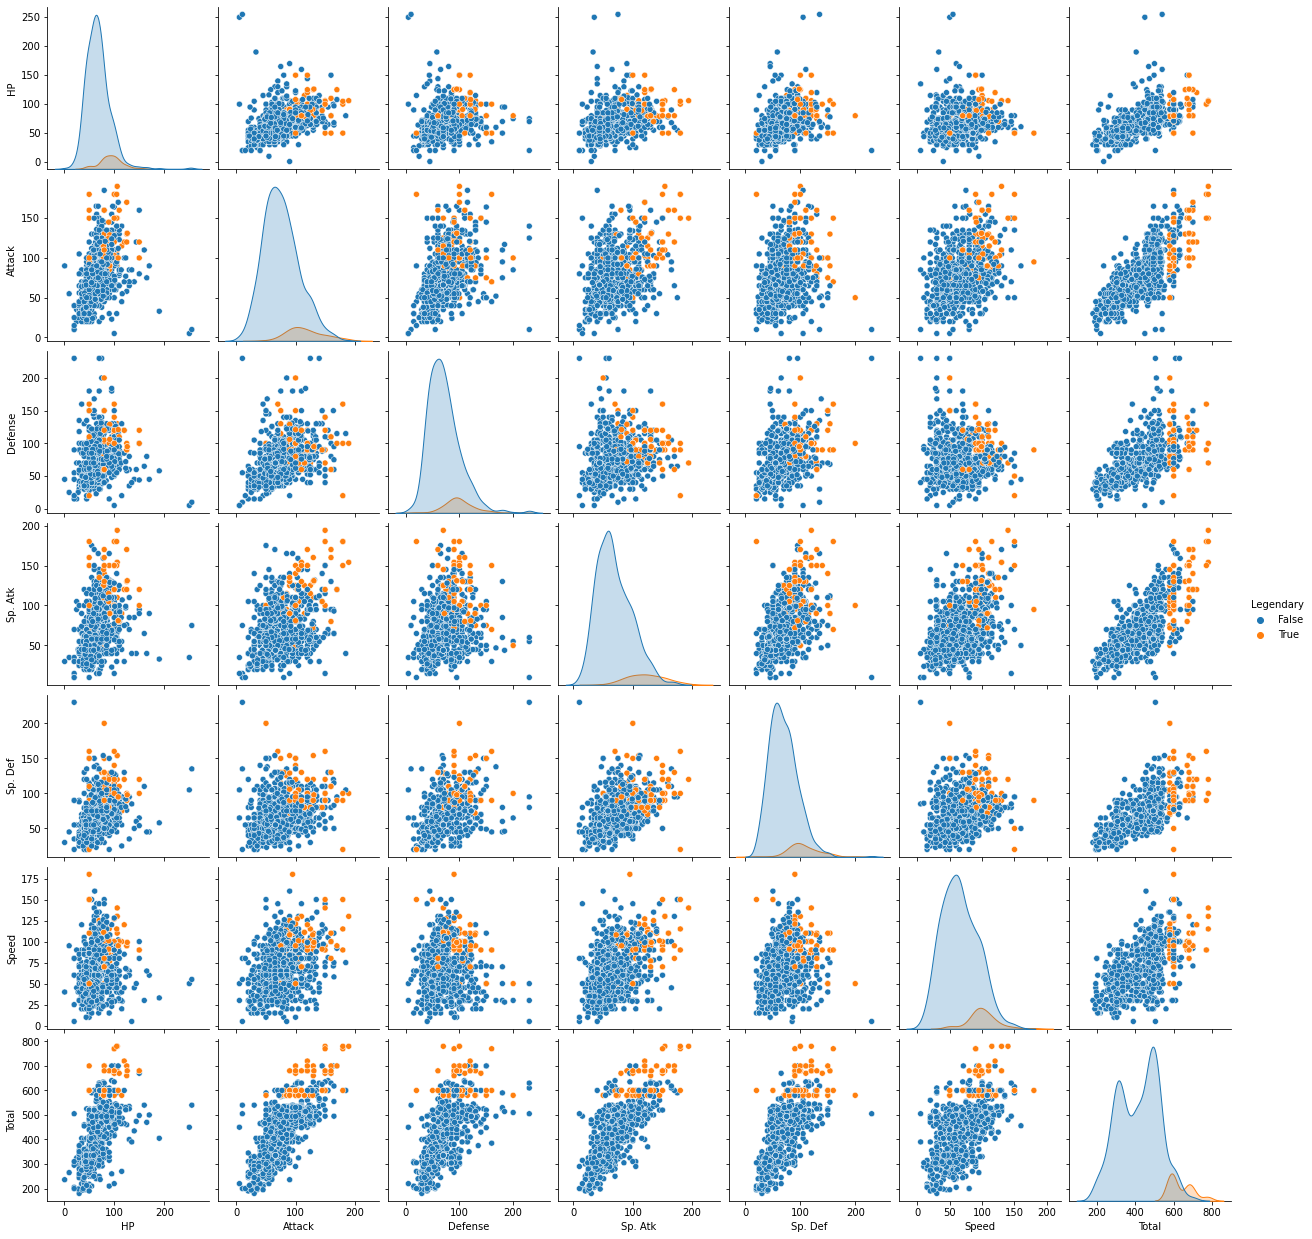

In [6]:
# sns.pairplot(df[stats + ["Legendary"]], hue="Legendary")
# sns.pairplot(df[stats + ["Generation"]], hue="Generation", palette="tab10")
sns.pairplot(df[stats + ["Total", "Legendary"]], hue="Legendary")

In [7]:
sorted(df["Type 1"].unique())

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [8]:
type1_avg = {}
for type_ in sorted(df["Type 1"].unique()):
    subdf = df[df["Type 1"] == type_]
    type1_avg[type_] = (subdf[stats].sum() / subdf.shape[0]).to_dict()

type1_avg

{'Bug': {'HP': 56.88405797101449,
  'Attack': 70.97101449275362,
  'Defense': 70.72463768115942,
  'Sp. Atk': 53.869565217391305,
  'Sp. Def': 64.79710144927536,
  'Speed': 61.68115942028985},
 'Dark': {'HP': 66.80645161290323,
  'Attack': 88.38709677419355,
  'Defense': 70.2258064516129,
  'Sp. Atk': 74.64516129032258,
  'Sp. Def': 69.51612903225806,
  'Speed': 76.16129032258064},
 'Dragon': {'HP': 83.3125,
  'Attack': 112.125,
  'Defense': 86.375,
  'Sp. Atk': 96.84375,
  'Sp. Def': 88.84375,
  'Speed': 83.03125},
 'Electric': {'HP': 59.79545454545455,
  'Attack': 69.0909090909091,
  'Defense': 66.29545454545455,
  'Sp. Atk': 90.02272727272727,
  'Sp. Def': 73.70454545454545,
  'Speed': 84.5},
 'Fairy': {'HP': 74.11764705882354,
  'Attack': 61.529411764705884,
  'Defense': 65.70588235294117,
  'Sp. Atk': 78.52941176470588,
  'Sp. Def': 84.70588235294117,
  'Speed': 48.588235294117645},
 'Fighting': {'HP': 69.85185185185185,
  'Attack': 96.77777777777777,
  'Defense': 65.9259259259259

In [9]:
type1_avg_df = pd.DataFrame(type1_avg).T.reset_index()
type1_avg_df.rename(columns={"index": "Type"}, inplace=True)
type1_avg_df

,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
1,Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
2,Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
3,Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
4,Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
5,Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
6,Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
7,Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
8,Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750
9,Grass,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571


In [10]:
df[stats + ["Type 1"]]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1
0,45,49,49,65,65,45,Grass
1,60,62,63,80,80,60,Grass
2,80,82,83,100,100,80,Grass
3,80,100,123,122,120,80,Grass
4,39,52,43,60,50,65,Fire
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,Rock
796,50,160,110,160,110,110,Rock
797,80,110,60,150,130,70,Psychic
798,80,160,60,170,130,80,Psychic


In [11]:
df[stats + ["Type 1"]].groupby("Type 1").mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


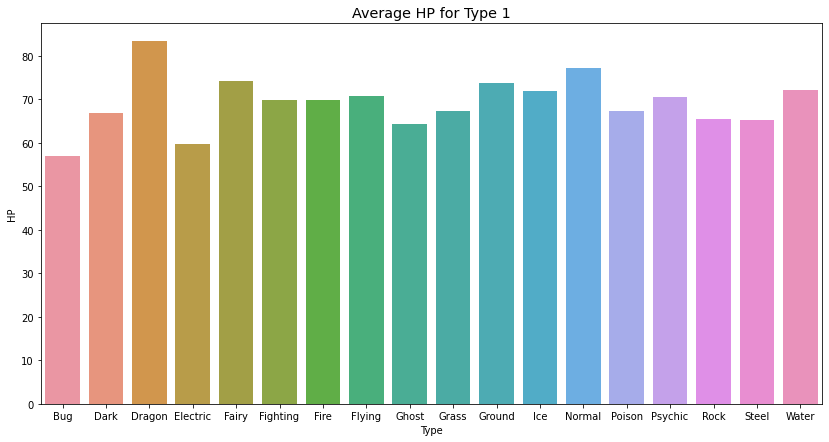

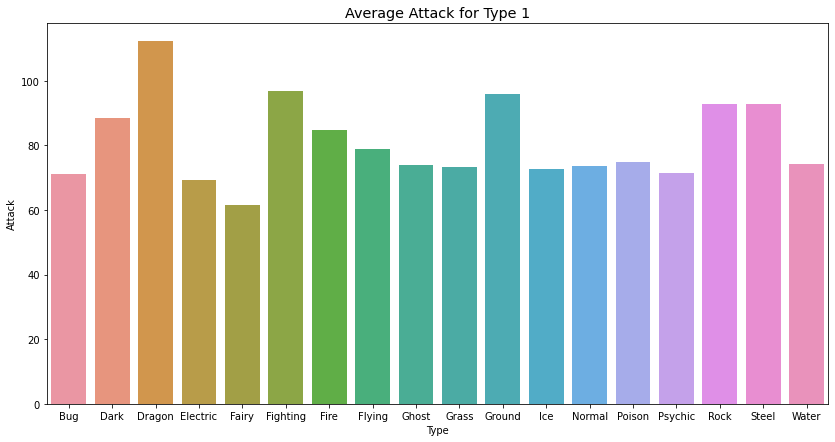

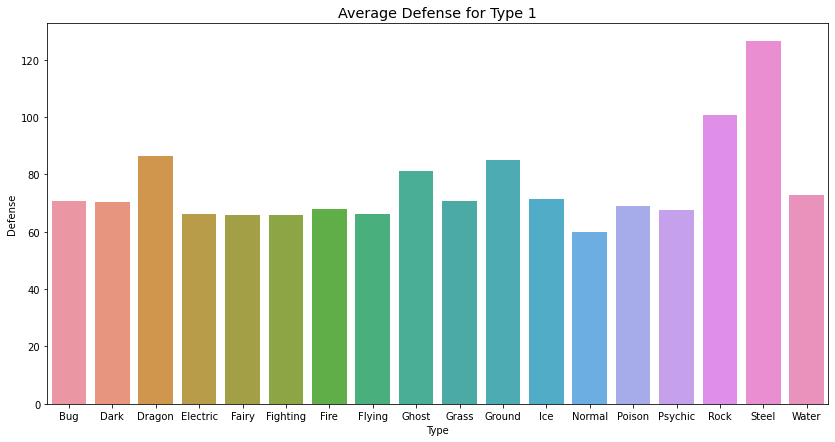

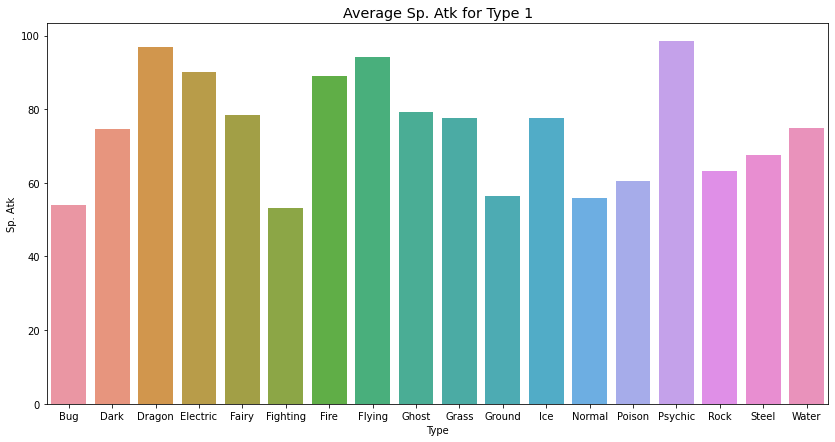

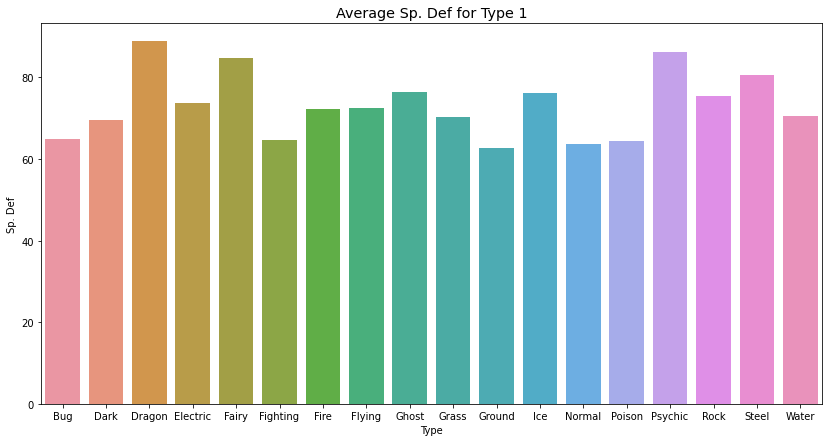

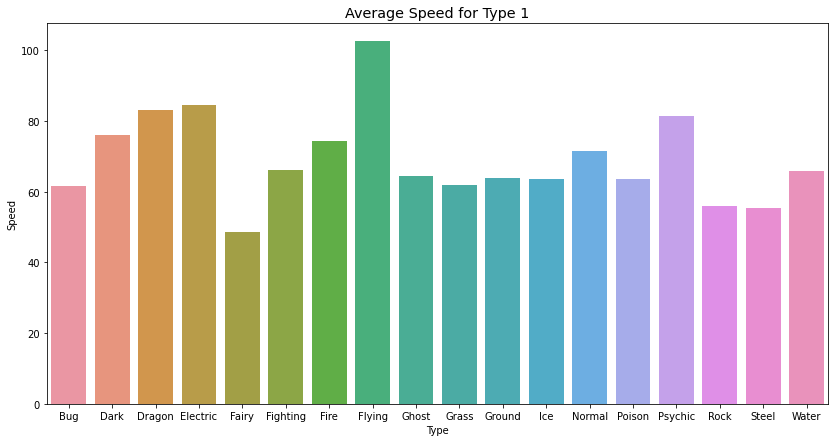

In [12]:
for stat in stats:
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.barplot(x="Type", y=stat, data=type1_avg_df)
    ax.set_title(f"Average {stat} for Type 1", fontsize="x-large")

In [13]:
# Normalize the stats
# https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#matching-broadcasting-behavior
df_normalized = df.copy()
df_normalized[stats] = df_normalized[stats].div(df["Total"], axis=0)
df_normalized

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1,False
1,2,Ivysaur,Grass,Poison,405,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1,False
2,3,Venusaur,Grass,Poison,525,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,0.128000,0.160000,0.196800,0.195200,0.192000,0.128000,1,False
4,4,Charmander,Fire,NaN,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,0.083333,0.166667,0.250000,0.166667,0.250000,0.083333,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,0.071429,0.228571,0.157143,0.228571,0.157143,0.157143,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,0.133333,0.183333,0.100000,0.250000,0.216667,0.116667,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,0.117647,0.235294,0.088235,0.250000,0.191176,0.117647,6,True


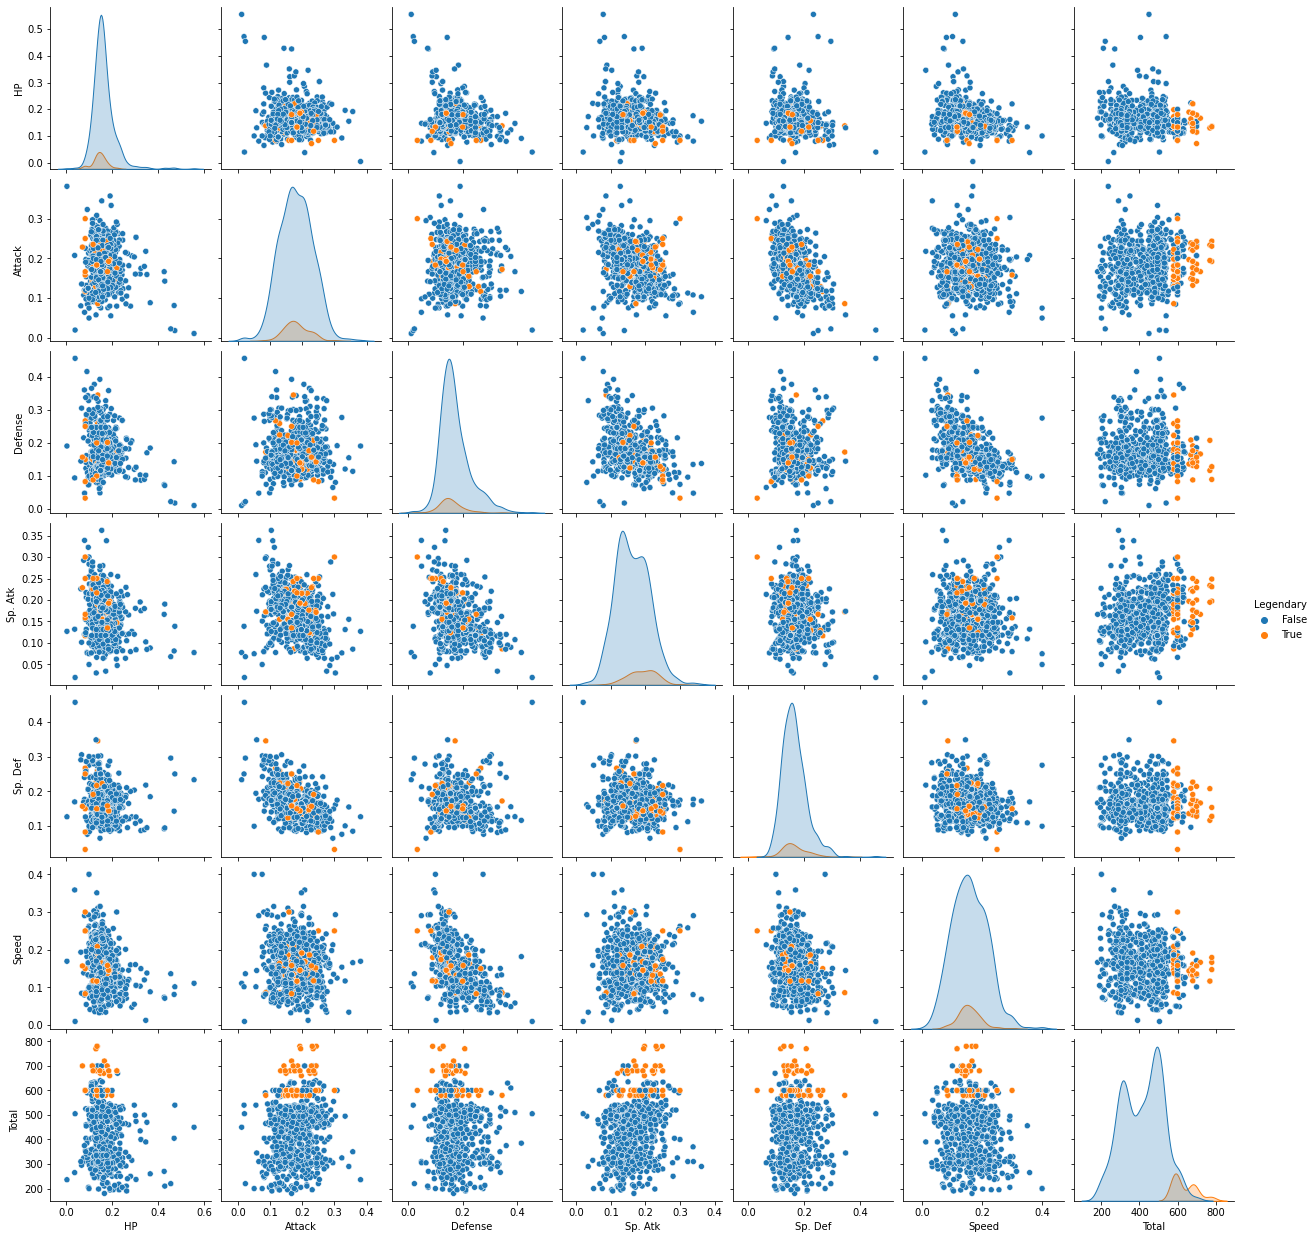

In [14]:
sns.pairplot(df_normalized[stats + ["Total", "Legendary"]], hue="Legendary")

In [15]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='Attack', ylabel='HP'>,
        <AxesSubplot:xlabel='Defense', ylabel='HP'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='HP'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='HP'>,
        <AxesSubplot:xlabel='Speed', ylabel='HP'>],
       [<AxesSubplot:xlabel='HP', ylabel='Attack'>,
        <AxesSubplot:xlabel='Attack', ylabel='Attack'>,
        <AxesSubplot:xlabel='Defense', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='Attack'>,
        <AxesSubplot:xlabel='Speed', ylabel='Attack'>],
       [<AxesSubplot:xlabel='HP', ylabel='Defense'>,
        <AxesSubplot:xlabel='Attack', ylabel='Defense'>,
        <AxesSubplot:xlabel='Defense', ylabel='Defense'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='Defense'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='Defense'>,
        <AxesSubplot:xlabel='Speed', ylabel='Defense'>],
       [<Axes

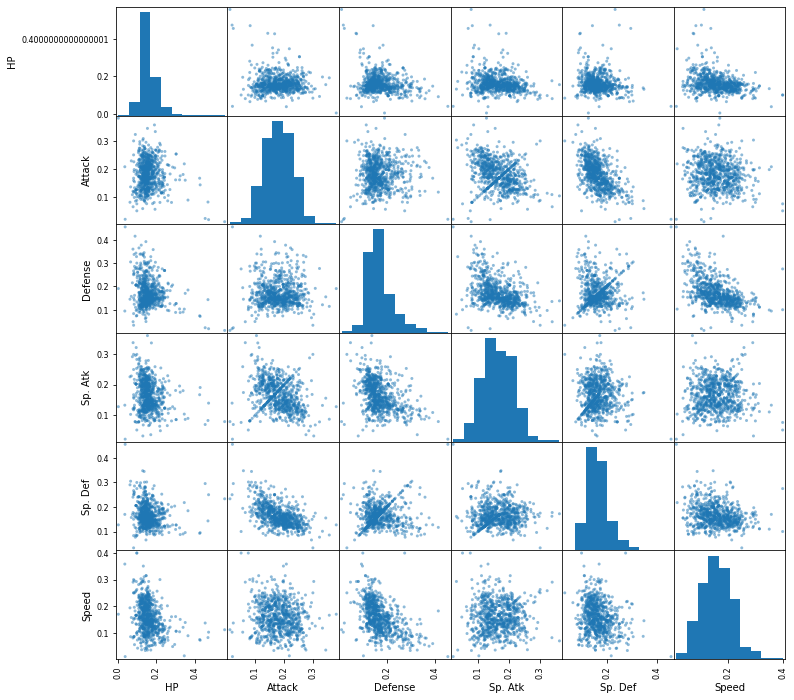

In [16]:
scatter_matrix(df_normalized[stats], figsize=(12, 12))